In [1]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.OptimizationProblem import OptimizationProblem

In [2]:
def func(x, beta=1.0):
    assert len(x) == 2, "Input must be a 2-dimensional vector."
    x1, x2 = x[0], x[1]
    f = x1**2 + beta * x2**2
    return f

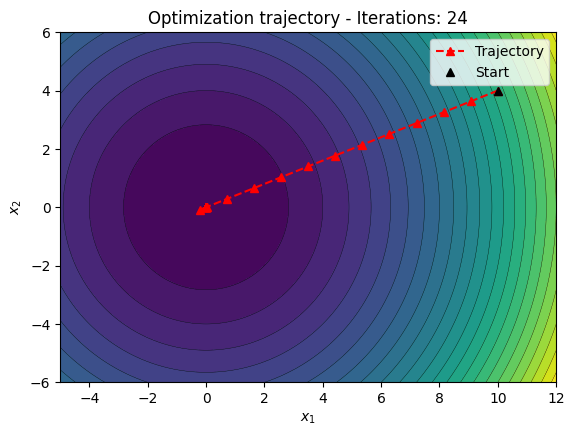

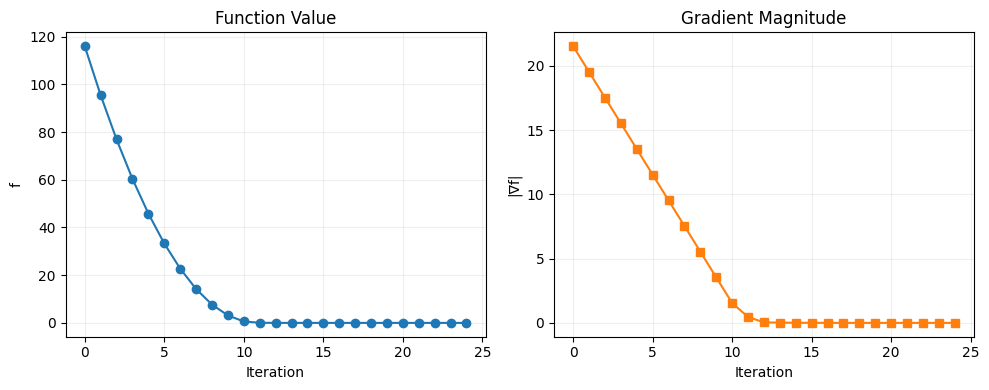

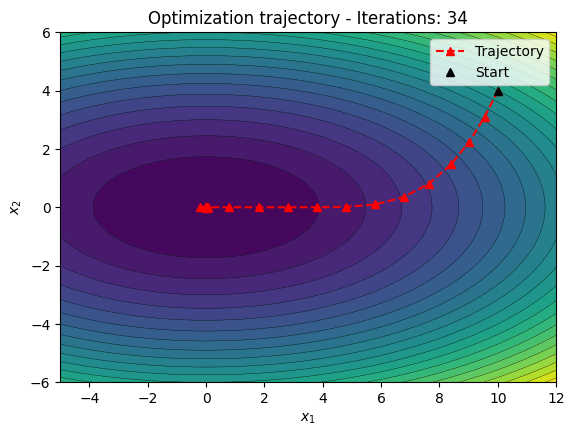

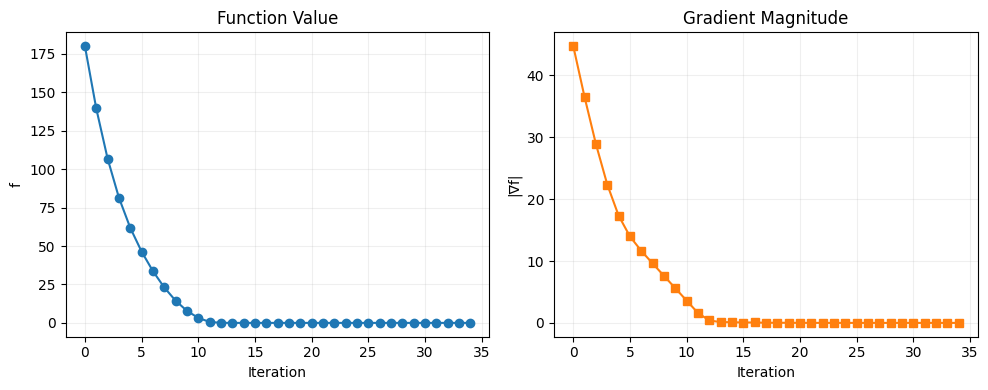

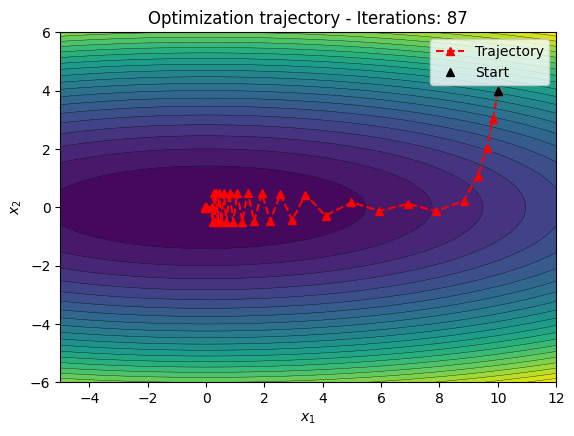

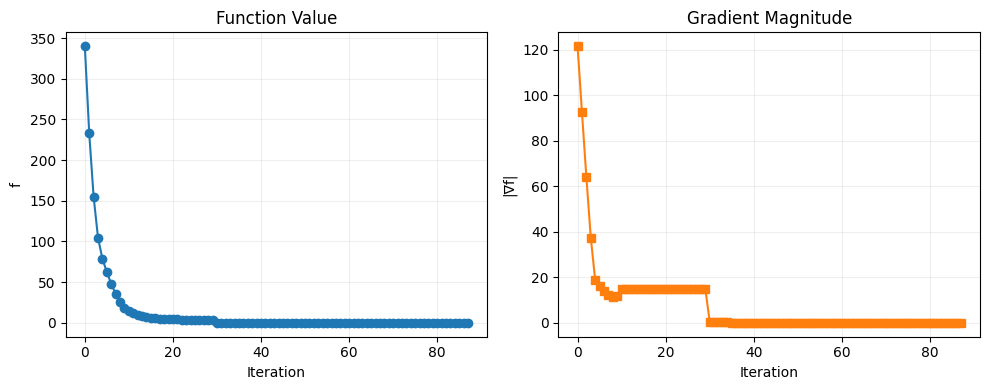

In [3]:
for beta in [1.0, 5.0, 15.0]:
    prob = OptimizationProblem(nDim=2, bounds=[(-5,12), (-6, 6)])
    prob.setObjectiveFunction(func, beta)
    history = prob.solve(x0=[10, 4], directionMethod='steepest_descent', stepMethod='backtracking', options={'maxIter':500, 'tol':1e-6})
    prob.plotSolutionHistory(history)
    prob.plotFunctionDecreaseHistory(history)